# 1) Color Identification in Images

## Importing libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline
print("Setup Complete")

Setup Complete


## Image analysis with OpenCV

[[[214 208 209]
  [213 207 208]
  [212 206 207]
  ...
  [ 98 112 124]
  [ 63  79  92]
  [ 58  75  88]]

 [[214 208 209]
  [213 207 208]
  [212 206 207]
  ...
  [ 83  97 109]
  [ 57  73  85]
  [ 55  73  84]]

 [[214 208 209]
  [214 208 209]
  [213 207 208]
  ...
  [ 77  89  99]
  [ 61  76  85]
  [ 57  74  83]]

 ...

 [[ 11  11  11]
  [  8  10  10]
  [  9  14  13]
  ...
  [ 35  84  68]
  [ 35  84  68]
  [ 34  83  67]]

 [[ 11  11  11]
  [ 12  12  12]
  [ 12  14  14]
  ...
  [ 36  85  69]
  [ 37  84  68]
  [ 33  80  64]]

 [[ 13  11  11]
  [ 14  14  14]
  [ 15  17  17]
  ...
  [ 37  86  70]
  [ 34  81  65]
  [ 24  71  55]]]
The type of this input is <class 'numpy.ndarray'>
Shape: (525, 700, 3)


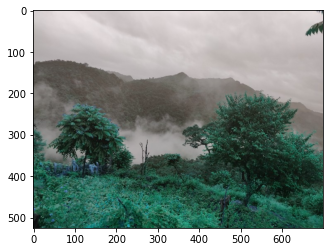

In [2]:
image = cv2.imread('sample_image.jpeg')
print(image)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Actual RGB image

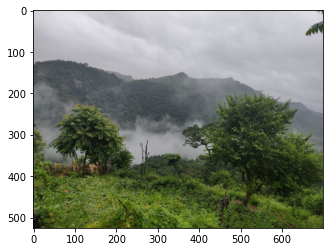

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Grayscale conversion

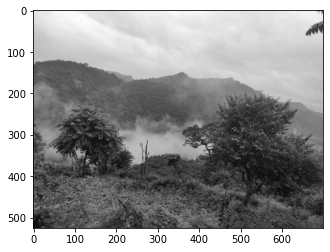

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Resizing

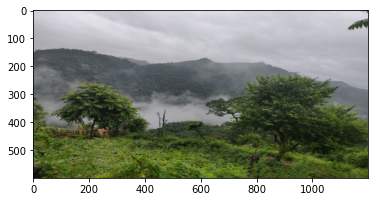

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# Color Identification

### RGB to Hex conversion

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Read image in RGB color space

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### Get colors from an image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    center_colors = clf.cluster_centers_
    
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

## Prediction result

[array([76.39173624, 92.71894043, 38.33914544]),
 array([178.80654915, 179.39883379, 185.84526091]),
 array([82.79421116, 89.43304815, 90.50962074]),
 array([52.98592809, 65.42415479, 32.37603601]),
 array([205.88247179, 205.56523417, 213.05344049]),
 array([28.52116583, 37.62927497, 18.07930537]),
 array([106.48939825, 122.06248519,  56.20634921]),
 array([119.60141813, 124.01435324, 123.73076923])]

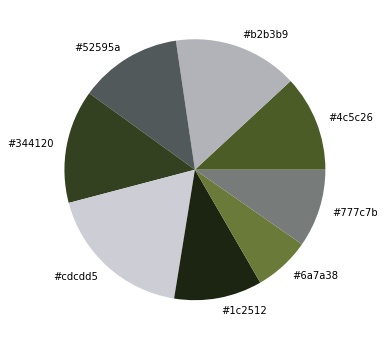

In [9]:
get_colors(get_image('sample_image.jpeg'), 8, True)

# 2) Image Identification using Colors

## Getting images

In [10]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

## Showing images

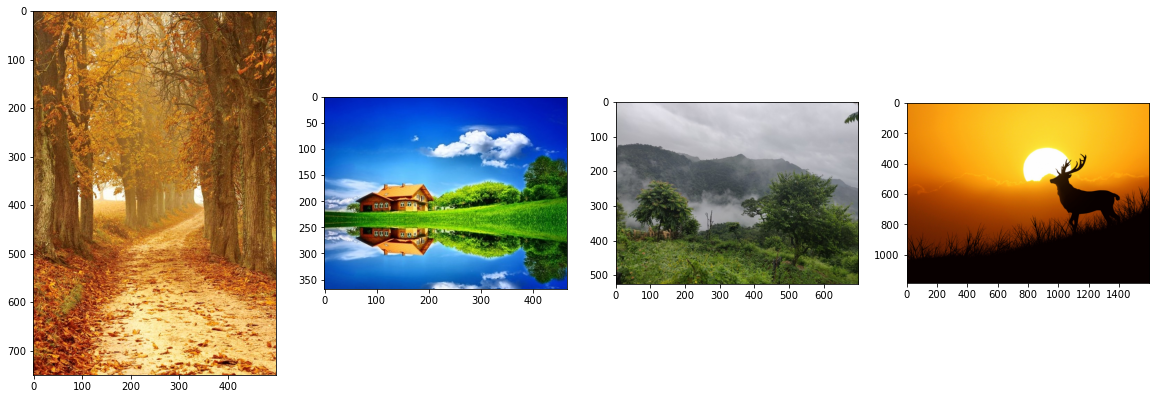

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Matching images with color

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

## Showing images with color

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## Filter results

### Green

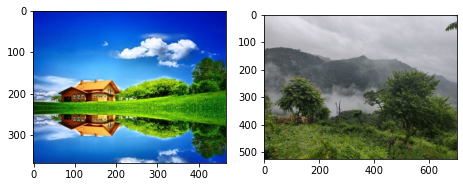

In [14]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

### Blue

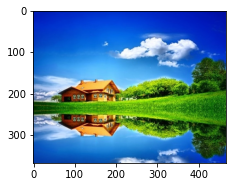

In [15]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

### Yellow

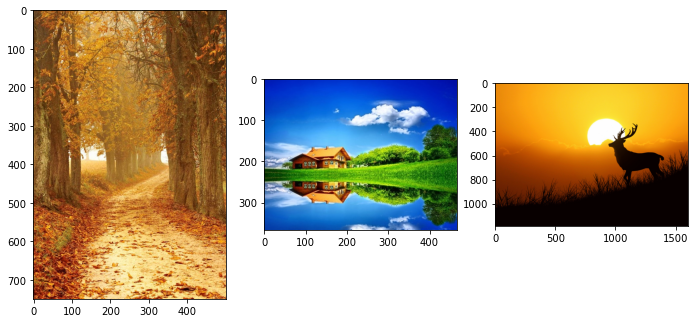

In [16]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

# We have thus discussed the machine learning technique to extract colors from an image using KMeans algorithm and use this to search images based on colors.